# Лабораторная работа №5
Реализовать для нахождения максимального по модулю собственного числа и соответствующего собственного вектора матрицы степенной метод и метод скалярных произведений.
- Вычисления проводить до достижения точности ε.
- Варьируя ε от $10^{−2}$ до $10^{−5}$, изучить зависимость количества итераций от ε.
- Сравнить количество итераций в методах (при каждом фиксированном ε).

In [13]:
import seaborn as sns
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from scipy.linalg import hilbert
import unittest
from parameterized import parameterized, parameterized_class
from tabulate import tabulate
import numpy.testing
from scipy.linalg import eigh

def run_test(TestCase):
    test_runner = unittest.TextTestRunner(verbosity=2)
    test_runner.run(unittest.makeSuite(TestCase))

## Степенной метод

In [14]:
def dot(a, b):
    return np.dot(a.T, b)[0]

def normalize(v):
    n = np.linalg.norm(v)
    return v / n if n != 0 else v

def power_iteration(A, eps, max_iterations=1000):
    N = A.shape[0]
    x = np.random.rand(N, 1)
    eig = 0
    iterations = 0
    while iterations < max_iterations:
        iterations += 1
        x_next = A @ x
        eig_next = math.sqrt(dot(x_next, x_next) / dot(x, x))

        if np.linalg.norm(x_next) > 1000:
            x_next = normalize(x_next)

        if abs(eig - eig_next) < eps:
            return eig_next, x_next, iterations

        x = x_next
        eig = eig_next

    return eig_next, x_next, iterations


## Тесты для степенного метода

In [15]:
def test_name(testcase_func, param_num, param):
    size = str(param.args[0])
    eps = str(param.args[1])
    return "%s_%s" %(
        testcase_func.__name__,
        parameterized.to_safe_name(f'_{size}x{size}_eps={eps}')
    )

def gen_matrix(N):
    a = np.random.rand(N, N)
    return a

def test_method(size, eps, method):
    A = gen_matrix(size)
    eigs = np.linalg.eigvals(A)
    eig = max(abs(eigs))

    actual_eig, actual_eigvec, iterations = method(A, eps)

    method_name = 'Степенной метод' if method == power_iteration else 'Метод скалярных произведений'
    table = {method_name: [actual_eig], 'Встроенная функция numpy': [eig]}
    print(f'Матрица {size}x{size}, eps={eps}')
    print(tabulate(table, headers='keys', tablefmt='psql'))


class PowerTestCase(unittest.TestCase):
    @parameterized.expand([(i, 10 ** -eps) for i, eps in product(range(2, 8), range(2, 6))], name_func=test_name)
    def test_power_iteration(self, size, eps):
        test_method(size, eps, power_iteration)

run_test(PowerTestCase)

test_power_iteration__2x2_eps_0_0001 (__main__.PowerTestCase) ... ok
test_power_iteration__2x2_eps_0_001 (__main__.PowerTestCase) ... ok
test_power_iteration__2x2_eps_0_01 (__main__.PowerTestCase) ... ok
test_power_iteration__2x2_eps_1e_05 (__main__.PowerTestCase) ... ok
test_power_iteration__3x3_eps_0_0001 (__main__.PowerTestCase) ... ok
test_power_iteration__3x3_eps_0_001 (__main__.PowerTestCase) ... ok
test_power_iteration__3x3_eps_0_01 (__main__.PowerTestCase) ... ok
test_power_iteration__3x3_eps_1e_05 (__main__.PowerTestCase) ... ok
test_power_iteration__4x4_eps_0_0001 (__main__.PowerTestCase) ... ok
test_power_iteration__4x4_eps_0_001 (__main__.PowerTestCase) ... ok
test_power_iteration__4x4_eps_0_01 (__main__.PowerTestCase) ... ok
test_power_iteration__4x4_eps_1e_05 (__main__.PowerTestCase) ... ok
test_power_iteration__5x5_eps_0_0001 (__main__.PowerTestCase) ... ok
test_power_iteration__5x5_eps_0_001 (__main__.PowerTestCase) ... ok
test_power_iteration__5x5_eps_0_01 (__main__.Po

Матрица 2x2, eps=0.0001
+-------------------+----------------------------+
|   Степенной метод |   Встроенная функция numpy |
|-------------------+----------------------------|
|          0.941881 |                    0.94188 |
+-------------------+----------------------------+
Матрица 2x2, eps=0.001
+-------------------+----------------------------+
|   Степенной метод |   Встроенная функция numpy |
|-------------------+----------------------------|
|          0.865261 |                   0.865333 |
+-------------------+----------------------------+
Матрица 2x2, eps=0.01
+-------------------+----------------------------+
|   Степенной метод |   Встроенная функция numpy |
|-------------------+----------------------------|
|          0.449344 |                   0.448785 |
+-------------------+----------------------------+
Матрица 2x2, eps=1e-05
+-------------------+----------------------------+
|   Степенной метод |   Встроенная функция numpy |
|-------------------+--------------------

ok

----------------------------------------------------------------------
Ran 24 tests in 0.080s

OK


## Метод скалярных произведений

In [16]:
def scalar_method(A, eps, max_iterations=10000):
    N = A.shape[0]
    x = np.random.rand(N, 1)
    y = x
    eig = 0
    iterations = 0
    while iterations < max_iterations:
        iterations += 1
        x_next = A @ x
        y_next = A.T @ y
        eig_next = dot(x_next, y_next) / dot(x, y_next)

        if np.linalg.norm(x_next) > 1000:
            x_next = normalize(x_next)
        if np.linalg.norm(y_next) > 1000:
            y_next = normalize(y_next)

        if abs(eig - eig_next) < eps:
            return eig_next, x_next, iterations

        x = x_next
        eig = eig_next

    return eig_next, x_next, iterations


### Тесты для метода скалярных произведений

In [17]:
class ScalarMethodTestCase(unittest.TestCase):
    @parameterized.expand([(i, 10 ** -eps) for i, eps in product(range(2, 8), range(2, 6))], name_func=test_name)
    def test_scalar_method(self, size, eps):
        test_method(size, eps, scalar_method)

run_test(ScalarMethodTestCase)

test_scalar_method__2x2_eps_0_0001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__2x2_eps_0_001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__2x2_eps_0_01 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__2x2_eps_1e_05 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__3x3_eps_0_0001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__3x3_eps_0_001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__3x3_eps_0_01 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__3x3_eps_1e_05 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__4x4_eps_0_0001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__4x4_eps_0_001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__4x4_eps_0_01 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__4x4_eps_1e_05 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__5x5_eps_0_0001 (__main__.ScalarMethodTestCase) ... ok
test_scalar_method__5x5_eps_0_001 (__main__.Scalar

Матрица 2x2, eps=0.0001
+--------------------------------+----------------------------+
|   Метод скалярных произведений |   Встроенная функция numpy |
|--------------------------------+----------------------------|
|                        1.09528 |                    1.09528 |
+--------------------------------+----------------------------+
Матрица 2x2, eps=0.001
+--------------------------------+----------------------------+
|   Метод скалярных произведений |   Встроенная функция numpy |
|--------------------------------+----------------------------|
|                         1.2433 |                     1.2433 |
+--------------------------------+----------------------------+
Матрица 2x2, eps=0.01
+--------------------------------+----------------------------+
|   Метод скалярных произведений |   Встроенная функция numpy |
|--------------------------------+----------------------------|
|                        1.27658 |                    1.27657 |
+--------------------------------+-

ok

----------------------------------------------------------------------
Ran 24 tests in 0.091s

OK


## Зависимость количества итераций от $\epsilon$

In [18]:
plt.style.use('default')
sns.color_palette('bright')

def plot(data, title, xticks):
    df = pd.DataFrame(data, index=xticks)

    plt.figure(figsize=(15, 10), dpi=80)

    for key in df.keys():
        plt.plot(df[key], label=key, marker='o')

    plt.title(title)
    plt.legend(title='Размерность матрицы')
    plt.xlabel('Епсилон', fontsize=20)
    plt.ylabel('Количество итераций', fontsize=20)
    plt.xscale('log')
    plt.show()

def get_data(method):
    data = {}
    for size in range(2, 12):
        key = f'{size}x{size}'
        data[key] = []
        A = gen_matrix(size)

        for eps in np.logspace(-2, -6, num=5):
            eig, vec, k = method(A, eps)
            data[key].append(k)
    return data

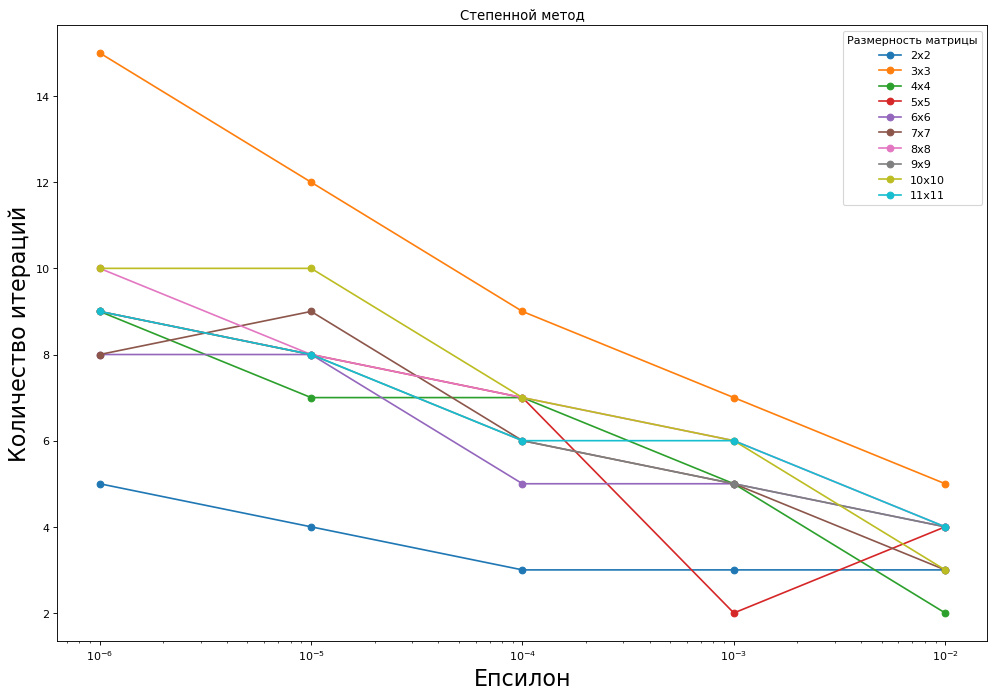

In [19]:
plot(get_data(power_iteration), 'Степенной метод', np.logspace(-2, -6, num=5))

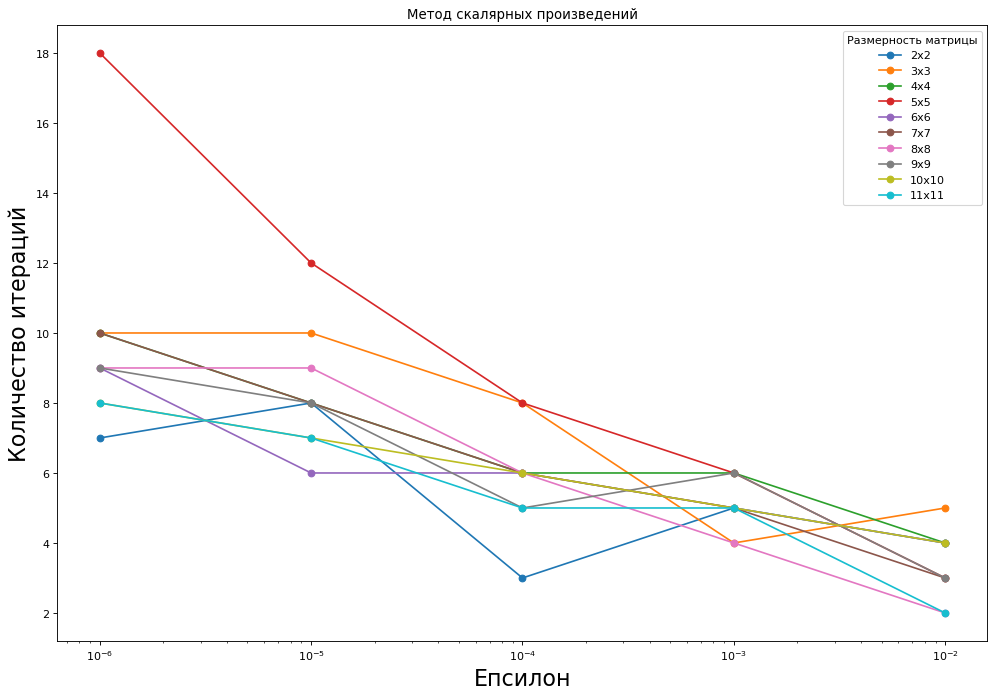

In [20]:
plot(get_data(scalar_method), 'Метод скалярных произведений', np.logspace(-2, -6, num=5))

## Сравнение количества итераций для разных методов

In [21]:
size_key = 'Размер матрицы'
eps_key = 'Епсилон'
power_key = 'Степенной метод'
scalar_key = 'Метод скалярных произведений'
data = {size_key: [], eps_key: [], power_key: [], scalar_key: []}
for size in range(2, 12):
    size_str = f'{size}x{size}'
    A = gen_matrix(size)

    for eps in np.logspace(-2, -15, num=5):
        data[size_key].append(size_str)
        data[eps_key].append(eps)
        eig, vec, k1 = power_iteration(A, eps)
        eig, vec, k2 = scalar_method(A, eps)
        data[power_key].append(k1)
        data[scalar_key].append(k2)

    data[size_key].append('')
    data[eps_key].append('')
    data[power_key].append('')
    data[scalar_key].append('')

print(tabulate(data, headers='keys', tablefmt='psql'))

+------------------+-----------+-------------------+--------------------------------+
| Размер матрицы   | Епсилон   | Степенной метод   | Метод скалярных произведений   |
|------------------+-----------+-------------------+--------------------------------|
| 2x2              | 0.01      | 3                 | 3                              |
| 2x2              | 0.0001    | 5                 | 4                              |
| 2x2              | 1e-06     | 6                 | 5                              |
| 2x2              | 1e-08     | 8                 | 7                              |
| 2x2              | 1e-10     | 10                | 9                              |
|                  |           |                   |                                |
| 3x3              | 0.01      | 4                 | 5                              |
| 3x3              | 0.0001    | 8                 | 6                              |
| 3x3              | 1e-06     | 13                | 1